In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Collecting opencv-python
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.8 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.1/38.8 MB 944.1 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.5/38.8 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.5/38.8 MB 1.9 MB/s eta 0:00:21
   - -------------------------------------- 1.0/38.8 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.2/38.8 MB 3.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/38.8 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 1.9/38.8 MB 4.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.9/38.8 MB 4.6 MB/s e


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
img = cv2.imread("server/test_images/virat1.jpg")
img.shape

(1038, 1600, 3)

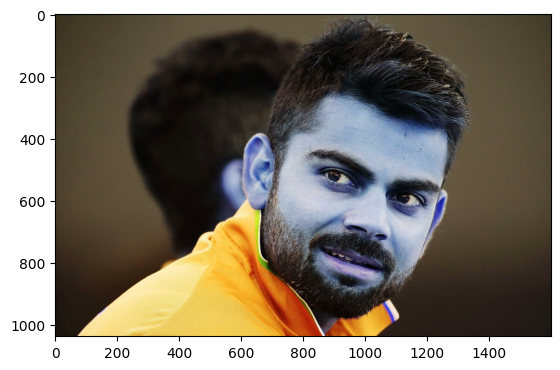

In [3]:
plt.imshow(img)

In [4]:
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1038, 1600)

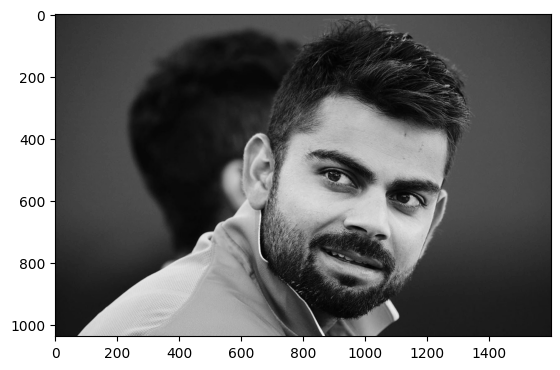

In [5]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade=cv2.CascadeClassifier('server/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('server/opencv/haarcascades/haarcascade_eye.xml')
face=face_cascade.detectMultiScale(gray,1.3,5)
face

array([[670, 285, 671, 671]])

In [8]:
(x,y,w,h)=face[0]
x,y,w,h

(670, 285, 671, 671)

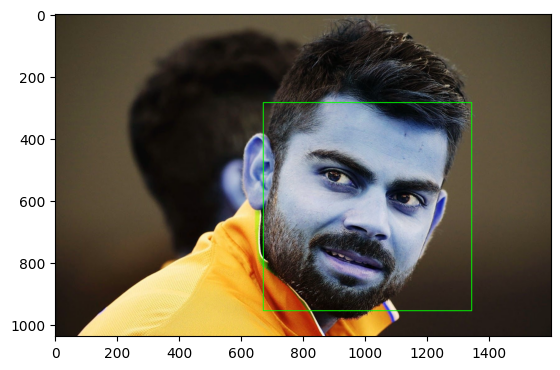

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

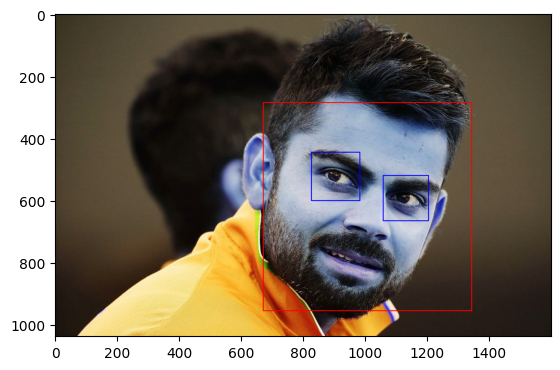

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in face:
    face_img=cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

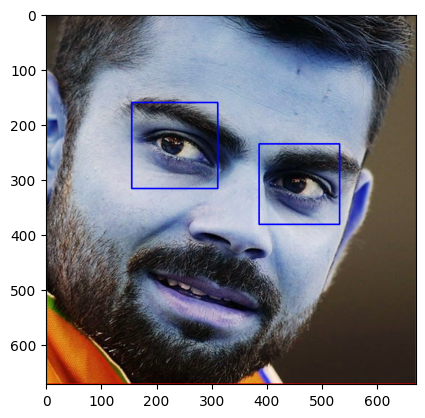

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
cropped_img=np.array(roi_color)
cropped_img.shape

(671, 671, 3)

In [15]:
pip install PyWavelets


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.3 MB 487.6 kB/s eta 0:00:09
    --------------------------------------- 0.1/4.3 MB 837.8 kB/s eta 0:00:05
   - -------------------------------------- 0.2/4.3 MB 1.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/4.3 MB 1.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/4.3 MB 2.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.8/4.3 MB 2.8 MB/s eta 0:00:02
   ----------- ---------------------------- 1.2/4.3 MB 3.4 MB/s eta 0:00:01
   ---------------- ----------------------- 1.7/4.3 MB 4.4 MB/s eta 0:00:01
   ------------------ --------------------- 2.0/4.3 MB 4.8 MB/s eta 0:00:01
   ------------------ --------------------- 2.0/4.3 MB 4.8 MB/s eta 0:00:01
   ------------------ --------------------- 2.0/4.3 MB 4.0 MB/s eta 0:00:01
   ------------------

In [16]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray = img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255;
    coeffs=pywt.wavedec2(imArray, mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray*= 255;
    imArray =np.uint8(imArray_H)
    return imArray_H

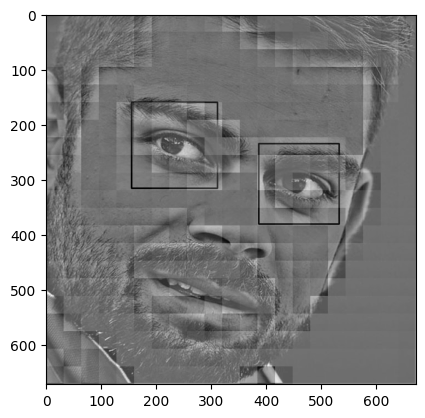

In [17]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
  
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

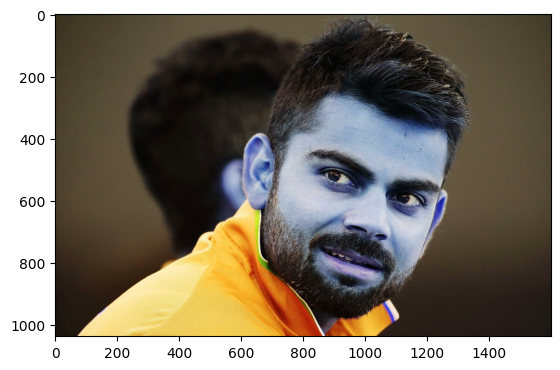

In [19]:
original_image=cv2.imread("server/test_images/virat1.jpg")
plt.imshow(original_image)

In [20]:
cropped_image=get_cropped_image_if_2_eyes("server/test_images/virat1.jpg")
cropped_image

array([[[ 32,  28,  23],
        [ 32,  28,  23],
        [ 32,  27,  24],
        ...,
        [ 92,  85,  66],
        [ 93,  86,  67],
        [ 96,  87,  67]],

       [[ 33,  29,  24],
        [ 33,  29,  24],
        [ 34,  27,  24],
        ...,
        [ 93,  86,  67],
        [ 94,  87,  68],
        [ 96,  86,  68]],

       [[ 33,  29,  24],
        [ 33,  29,  24],
        [ 32,  27,  24],
        ...,
        [ 94,  87,  68],
        [ 94,  87,  68],
        [ 96,  86,  68]],

       ...,

       [[238, 161,  34],
        [233, 156,  30],
        [238, 158,  35],
        ...,
        [ 40,  34,  23],
        [ 40,  34,  23],
        [ 40,  34,  23]],

       [[236, 161,  33],
        [234, 157,  31],
        [237, 157,  34],
        ...,
        [ 40,  33,  24],
        [ 40,  33,  24],
        [ 40,  34,  23]],

       [[235, 160,  32],
        [236, 160,  34],
        [231, 153,  30],
        ...,
        [ 40,  33,  24],
        [ 40,  33,  24],
        [ 40,  33,  24]]

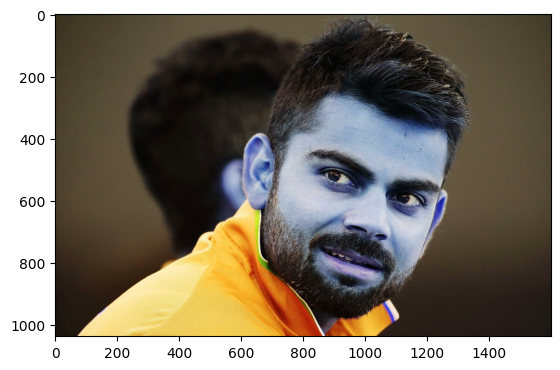

In [21]:
org_image_obstructed=cv2.imread("server/test_images/virat1.jpg")
plt.imshow(org_image_obstructed)

In [22]:
cropped_image_2=get_cropped_image_if_2_eyes("server/test_images/virat1.jpg")
cropped_image_2

array([[[ 32,  28,  23],
        [ 32,  28,  23],
        [ 32,  27,  24],
        ...,
        [ 92,  85,  66],
        [ 93,  86,  67],
        [ 96,  87,  67]],

       [[ 33,  29,  24],
        [ 33,  29,  24],
        [ 34,  27,  24],
        ...,
        [ 93,  86,  67],
        [ 94,  87,  68],
        [ 96,  86,  68]],

       [[ 33,  29,  24],
        [ 33,  29,  24],
        [ 32,  27,  24],
        ...,
        [ 94,  87,  68],
        [ 94,  87,  68],
        [ 96,  86,  68]],

       ...,

       [[238, 161,  34],
        [233, 156,  30],
        [238, 158,  35],
        ...,
        [ 40,  34,  23],
        [ 40,  34,  23],
        [ 40,  34,  23]],

       [[236, 161,  33],
        [234, 157,  31],
        [237, 157,  34],
        ...,
        [ 40,  33,  24],
        [ 40,  33,  24],
        [ 40,  34,  23]],

       [[235, 160,  32],
        [236, 160,  34],
        [231, 153,  30],
        ...,
        [ 40,  33,  24],
        [ 40,  33,  24],
        [ 40,  33,  24]]

In [25]:
path_to_data="images_dataset/"
path_to_cr_data="server/images_dataset/cropped/"

In [26]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['images_dataset/lionel_messi',
 'images_dataset/maria_sharapova',
 'images_dataset/roger_federer',
 'images_dataset/serena_williams',
 'images_dataset/virat_kohli']

In [29]:
import os
import shutil

path_to_cr_data = 'server/images_dataset/cropped/'

# This will create all necessary parent directories.
os.makedirs(os.path.dirname(path_to_cr_data), exist_ok=True)

if os.path.exists(path_to_cr_data):
	shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [30]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count =1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating gropped images in this folder",cropped_folder)
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder + "/"+ cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1
            

generating gropped images in this folder server/images_dataset/cropped/lionel_messi
generating gropped images in this folder server/images_dataset/cropped/maria_sharapova
generating gropped images in this folder server/images_dataset/cropped/roger_federer
generating gropped images in this folder server/images_dataset/cropped/serena_williams
generating gropped images in this folder server/images_dataset/cropped/virat_kohli


In [31]:
celebrity_file_name_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split("/")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['server/images_dataset/cropped/lionel_messi\\lionel_messi1.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi10.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi11.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi12.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi13.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi14.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi15.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi16.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi17.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi18.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi19.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi2.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi20.png',
  'server/images_dataset/cropped/lionel_messi\\lionel_messi21.png',
  'server/images_dataset/cropped/l

In [32]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [33]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img, (32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har, (32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7446808510638298

In [37]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.83      0.71      0.77         7
           2       0.50      0.33      0.40         6
           3       0.88      0.70      0.78        10
           4       0.78      1.00      0.88        14

    accuracy                           0.74        47
   macro avg       0.72      0.69      0.70        47
weighted avg       0.74      0.74      0.73        47



In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [40]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.741005,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.596296,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.820106,{'logisticregression__C': 1}


In [41]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [42]:
best_estimators['svm'].score(X_test,y_test)

0.7021276595744681

In [43]:
best_estimators['random_forest'].score(X_test,y_test)

0.574468085106383

In [44]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7872340425531915

In [45]:
best_clf = best_estimators['svm']

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  3],
       [ 0,  5,  0,  2,  0],
       [ 0,  1,  4,  1,  0],
       [ 1,  1,  1,  6,  1],
       [ 1,  1,  1,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

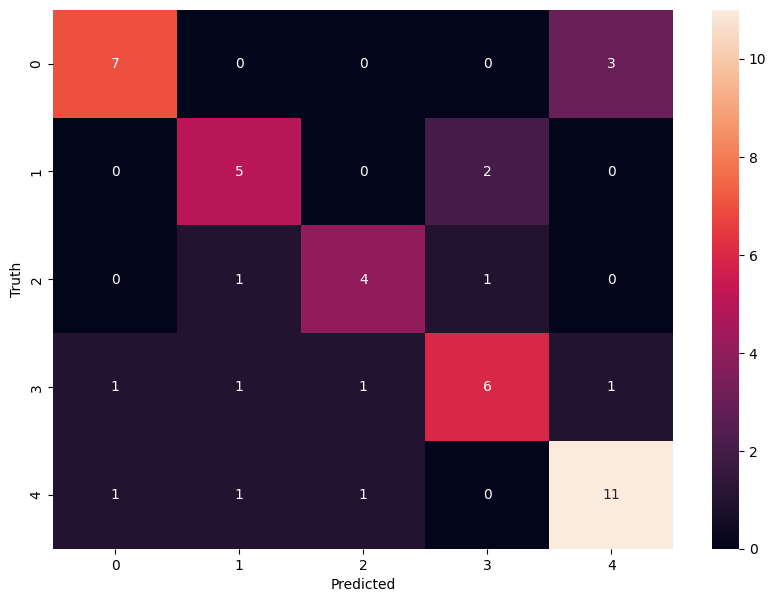

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [49]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))